# **Phase 1: Data Preparation**

**Team 03:**

- Bruno Fernandes, up202108871
- Hugo Abelheira, up202409899
- Luís Pereira, up200502498

## **Table of Contents**

* [Introduction](#intro)
    * [Six-Step Statistical Investigation](#six_step)
    * [Dataset Source](#dataset_source)
    * [Dataset Description](#dataset_description)
* [Defining the Investigation](#defining)
    * [Research Question](#research_question)
    * [Variables of Interest](#variables)
    * [Collecting Data](#collecting_data)
    * [Exploring Data](#exploring_data) 
    * [Goals and Objectives](#goals)
* [Imports](#imports)
* [Data Preparation](#data_prep)
* [Data Exploration & Visualization](#data_viz)

## **Introduction** <a class="anchor" id="intro"></a>

This project will be divided into two phases: Phase 1, focused on data preprocessing, and Phase 2, dedicated to inferences and conclusions.

We will conduct a statistical investigation using the Six-Step Statistical Investigation method, which offers a clear, structured approach to analyzing data and answering key questions. This method is valuable for ensuring that each step, from defining the question to interpreting the results, is handled systematically. By following these steps, we aim to collect and analyze data effectively, leading to reliable and meaningful conclusions.

### **Six-Step Statistical Investigation** <a class="anchor" id="six_step"></a>

1. Ask a research question
2. Design study and collect data
3. Explore the data
4. Draw inference
5. Formulate conclusions
6. Look back and ahead

### **Dataset Source** <a class="anchor" id="dataset_source"></a>

The datasets used in this project can be found here: [ICNF](https://www.icnf.pt/florestas/gfr/gfrgestaoinformacao/estatisticas). It contains information about the wildfires in Portugal from 2001 to 2023.

### **Dataset Description** <a class="anchor" id="dataset_description"></a>

Our data is organized into two main sets of datasets: one covering total wildfire statistics from 2001 to 2023, and another detailing individual wildfire statistics.

The first dataset, which provides comprehensive statistics, is divided into three sheets: Estatisticas_Portugal_Continent, Estatisticas_Distrito, and Estatisticas_Concelho. It includes columns such as year, district, the number of rural fires, and the total burned area (broken down into categories like populated, forest, and agricultural areas).

The second dataset set focuses on individual wildfire incidents and is divided into three separate datasets: SGIF_2001_2010, SGIF_2011_2020, and SGIF_2021_2023. These datasets include more granular information, such as date and time of the alert, the burned area (forested, agricultural, populated), duration, and fire causes.


## **Defining the Investigation** <a class="anchor" id="defining"></a>

We will now outline the modeling of our research problem, starting with the definition of the research question and addressing the initial steps of the Six-Step Statistical Investigation method. This will set the foundation for a clear and structured approach to our data analysis.

### **Research Question** <a class="anchor" id="research_question"></a>

Our primary research question is: **"How does the average fire duration influence the frequency of wildfires across different regions over time?"** This question aims to explore the relationship between how long wildfires last and how frequently they occur in various regions of Portugal, providing a broad understanding of wildfire dynamics over time.

To complement and deepen our analysis, we have two additional sub-questions that derived from the first one. Starting with, **"How do the durations of wildfires differ across regions (in this case, districts) in Portugal from 2011 to 2020?"**, focuses on regional differences in wildfire durations, helping us identify patterns or anomalies in specific areas. The second sub-question is **"Has the duration of wildfires decreased after 2017?"**, aims to assess the impact of potential policy changes or environmental factors, comparing wildfire durations before and after 2017, with specific focus on years like 2010, 2016, and 2022.

Together, these sub-questions provide important context and insights that support our primary investigation.

### **Variables of Interest** <a class="anchor" id="variables"></a>
Qualitative Variables
* Distrito
* TipoCausa
* TypeArea

Quantitative Variables
* Duracao_Horas
* AreaTotal
* Anos

### **Collecting Data** <a class="anchor" id="collecting_data"></a>

For this project, we utilized datasets from the Instituto da Conservação da Natureza e das Florestas (ICNF), a trusted source for wildfire statistics in Portugal. By relying on these credible datasets, we avoided the complexities of primary data collection. The information provided by ICNF includes essential variables such as fire duration, frequency, and geographical details, allowing us to conduct a thorough analysis of wildfire dynamics in the region.

### **Exploring Data** <a class="anchor" id="exploring_data"></a>

From now until the end of this notebook, we will focus on the preprocessing of our datasets. This stage is crucial for preparing the data to analyze our research questions and derive meaningful inferences and conclusions (phase 2).

### **Goals and Objectives** <a class="anchor" id="goals"></a>

The primary objective of this project is to analyze the impact of various factors on wildfire occurrences in Portugal from 2011 to 2020. Specifically, we aim to explore how the average fire duration influences the frequency of wildfires across different regions, utilizing qualitative variables such as District, CauseType, and AreaClass, alongside quantitative variables like Duration_Hours, TotalArea, and Year.

Through this analysis, we aim to provide insights that can inform better wildfire management strategies and enhance our understanding of the dynamics of fire incidents in various districts.

## **Imports** <a class="anchor" id="imports"></a>

This section contains all the imports necessary to execute our investigation in any local machine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preparation** <a class="anchor" id="data_prep"></a>

In this phase of the project, we will focus on data preparation, a crucial step in any statistical analysis. Proper data preparation ensures that the dataset is clean, consistent, and ready for analysis. This process is essential to improve the quality and accuracy of the results, allowing for meaningful insights to be drawn from the analysis.

Our data preparation consists of the following steps: 
1. Filtering columns;
2. Check quantity of missing values;
3. Remove missing values;
4. Feature Engineering;
5. Random Sampling;

We begin by reading the data files into the notebook, which contain multiple datasets from different time periods and geographical levels.

In [2]:
files = {
    'datasets/Registos_Incendios_SGIF_2011_2020.xlsx': ['SGIF_2011_2020'],
    'datasets/Estatisticas_Incendios_SGIF_2001_2023.xlsx': ['Estatisticas_PortugalContinent', 'Estatisticas_Distrito', 'Estatisticas_Concelho']
}

datasets = {}

for file, sheets in files.items():
    for sheet in sheets:
        datasets[sheet] = pd.read_excel(file, sheet_name=sheet)

datasets

{'SGIF_2011_2020':        Codigo_SGIF   Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  \
 0           DM2111            368  2011    1    1    17         0.0   
 1           BL4112           1236  2011    1    9    22         0.0   
 2           DM3111            820  2011    1   15    17         0.0   
 3           BL2111           1977  2011    1   18    22         0.0   
 4           DM2113           7930  2011    1   19    17         0.0   
 ...            ...            ...   ...  ...  ...   ...         ...   
 177124   DM4201609  2020030093117  2020   12   26    17         0.0   
 177125   BL3201353  2020010094589  2020   12   26    18         0.0   
 177126    BI120667  2020090037964  2020   12   27    15         0.0   
 177127   RO3201090  2020150105337  2020   12   28    18         0.0   
 177128    TM220443  2020040034744  2020   12   30    17         0.0   
 
         AreaMato_ha  AreaAgric_ha  AreaTotal_ha  ...       ISI         DC  \
 0            0.0100       0.00000    

Next, we select the columns of interest from the dataset "SGIF_2011_2020", focusing on the variables that are most relevant for our analysis.

In [3]:
# change the SGIF_2011_2020 dataset to have only these columns: Codigo_SGIF, Ano, AreaTotal_ha, ClasseArea,	Duracao_Horas, IncSup24horas, Distrito, Concelho, FonteAlerta
datasets['SGIF_2011_2020'] = datasets['SGIF_2011_2020'][['Codigo_SGIF', 'Ano', 'AreaPov_ha', 'AreaMato_ha', 'AreaAgric_ha', 'AreaTotal_ha', 'ClasseArea', 'Duracao_Horas', 'IncSup24horas', 'Distrito', 'Concelho', 'FonteAlerta']]
datasets['SGIF_2011_2020']

,Codigo_SGIF,Ano,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,ClasseArea,Duracao_Horas,IncSup24horas,Distrito,Concelho,FonteAlerta
0,DM2111,2011,0.0,0.0100,0.00000,0.01000,]0 a 1 ha[,0.733333,0,Porto,Penafiel,Populares
1,BL4112,2011,0.0,0.0000,0.00200,0.00200,]0 a 1 ha[,1.650000,0,Leiria,Pombal,Populares
2,DM3111,2011,0.0,0.0000,0.00001,0.00001,]0 a 1 ha[,11.716667,0,Viana do Castelo,Vila Nova de Cerveira,Populares
3,BL2111,2011,0.0,0.0010,0.00000,0.00100,]0 a 1 ha[,0.583333,0,Coimbra,Oliveira do Hospital,Populares
4,DM2113,2011,0.0,0.0050,0.00000,0.00500,]0 a 1 ha[,0.783333,0,Porto,Vila Nova de Gaia,Populares
...,...,...,...,...,...,...,...,...,...,...,...,...
177124,DM4201609,2020,0.0,0.0100,0.00000,0.01000,]0 a 1 ha[,0.700000,0,Braga,Vila Verde,Populares
177125,BL3201353,2020,0.0,3.5414,0.00000,3.54140,[1 a 10 ha],3.000000,0,Aveiro,Arouca,Populares
177126,BI120667,2020,0.0,0.0015,0.00000,0.00150,]0 a 1 ha[,0.383333,0,Guarda,Celorico da Beira,117
177127,RO3201090,2020,0.0,0.0133,0.00000,0.01330,]0 a 1 ha[,0.433333,0,Setúbal,Palmela,117


We now select the columns of interest from the "Estatisticas_PortugalContinent" dataset, ensuring we capture the key variables needed for the national-level analysis.

In [4]:
# change the Estatisticas_PortugalContinent dataset to have only these columns: Ano, Num_IncendiosRurais, AreaArdTotal, NInc_Natural, NInc_Negligente, NInc_Intencionais, NInc_Reacendimentos, NInc_Desconhecida, NInc_NaoInvestigados, Ninc_Sup24h
datasets['Estatisticas_PortugalContinent'] = datasets['Estatisticas_PortugalContinent'][['Ano', 'Num_IncendiosRurais', 'AreaArdTotal', 'NInc_Natural', 'NInc_Negligente', 'NInc_Intencionais', 'NInc_Reacendimentos', 'NInc_Desconhecida', 'NInc_NaoInvestigados', 'Ninc_Sup24h']]
datasets['Estatisticas_PortugalContinent']


,Ano,Num_IncendiosRurais,AreaArdTotal,NInc_Natural,NInc_Negligente,NInc_Intencionais,NInc_Reacendimentos,NInc_Desconhecida,NInc_NaoInvestigados,Ninc_Sup24h
0,2001,28915,117420.438657,38,391,475,1159,208,26644,133
1,2002,28993,130849.078350,12,414,394,1625,221,26327,196
2,2003,28087,471750.049431,77,522,436,1098,230,25724,197
3,2004,27829,151369.876610,14,421,364,1055,284,25691,145
4,2005,41689,346717.819232,3,456,619,1997,377,38237,511
5,2006,24243,83705.863650,83,502,381,304,1804,21169,190
6,2007,25133,36412.547360,63,3203,1424,565,4292,15586,72
7,2008,18958,19897.219299,28,3490,1570,319,4367,9184,139
8,2009,29783,92125.662431,126,5190,3540,1272,4571,15084,398
9,2010,26113,140953.185960,113,4161,2845,2722,6974,9298,475


Next, we select the columns of interest from the "Estatisticas_Distrito" dataset, focusing on the variables that provide insights at the district level.

In [17]:
# change the Estatisticas_Distrito dataset to have only these columns: 'Ano', 'Distrito', 'Num_IncendiosRurais', 'NInc_Natural', 'NInc_Negligente', 'NInc_Intencionais', 'NInc_Reacendimentos', 'NInc_Desconhecida', 'NInc_NaoInvestigados', 'Ninc_Sup24h'
datasets['Estatisticas_Distrito'] = datasets['Estatisticas_Distrito'][['Ano', 'Distrito', 'Num_IncendiosRurais', 'NInc_Natural', 'NInc_Negligente', 'NInc_Intencionais', 'NInc_Reacendimentos', 'NInc_Desconhecida', 'NInc_NaoInvestigados', 'Ninc_Sup24h']]
datasets['Estatisticas_Distrito']

,Ano,Distrito,Num_IncendiosRurais,NInc_Natural,NInc_Negligente,NInc_Intencionais,NInc_Reacendimentos,NInc_Desconhecida,NInc_NaoInvestigados,Ninc_Sup24h
187,2011,FARO,441,0,76,3,2,129,231,3
192,2011,PORTO,6691,1,1093,496,912,617,3572,54
197,2011,VISEU,2343,22,857,713,237,496,18,38
277,2016,FARO,274,0,131,31,2,109,1,2
282,2016,PORTO,4285,0,855,59,370,986,2015,6
287,2016,VISEU,1134,5,355,310,162,301,1,16
349,2020,FARO,209,0,101,35,0,73,0,1
354,2020,PORTO,2469,1,106,120,169,1272,801,0
359,2020,VISEU,577,13,299,189,29,47,0,4


Finally, we select the columns of interest from the "Estatisticas_Concelho" dataset, concentrating on the variables that are critical for our analysis at the municipal level.

In [6]:
# change the Estatisticas_Concelho dataset to have only these columns: 'Ano', 'Distrito', 'Concelho', 'Num_IncendiosRurais', 'NInc_Natural', 'NInc_Negligente', 'NInc_Intencionais', 'NInc_Reacendimentos', 'NInc_Desconhecida', 'NInc_NaoInvestigados', 'Ninc_Sup24h'
datasets['Estatisticas_Concelho'] = datasets['Estatisticas_Concelho'][['Ano', 'Distrito', 'Concelho', 'Num_IncendiosRurais', 'NInc_Natural', 'NInc_Negligente', 'NInc_Intencionais', 'NInc_Reacendimentos', 'NInc_Desconhecida', 'NInc_NaoInvestigados', 'Ninc_Sup24h']]
datasets['Estatisticas_Concelho']

,Ano,Distrito,Concelho,Num_IncendiosRurais,NInc_Natural,NInc_Negligente,NInc_Intencionais,NInc_Reacendimentos,NInc_Desconhecida,NInc_NaoInvestigados,Ninc_Sup24h
0,2001,AVEIRO,ÁGUEDA,84,0,1,0,3,0,80,0
1,2001,AVEIRO,ALBERGARIA-A-VELHA,87,0,0,2,6,0,79,0
2,2001,AVEIRO,ANADIA,65,0,1,5,2,0,57,0
3,2001,AVEIRO,AROUCA,253,0,3,1,0,0,249,1
4,2001,AVEIRO,AVEIRO,39,0,0,0,2,0,37,0
...,...,...,...,...,...,...,...,...,...,...,...
6361,2023,Viseu,Tarouca,13,1,9,2,1,0,0,0
6362,2023,Viseu,Tondela,28,1,16,7,0,4,0,0
6363,2023,Viseu,Vila Nova de Paiva,41,1,23,17,0,0,0,0
6364,2023,Viseu,Viseu,58,1,26,12,0,19,0,0


We will now filter the datasets to include only the years of interest: 2011, 2016, and 2020. This selection allows us to focus our analysis on specific time periods relevant to our study.

In [7]:
# filter all the datasets to have only the years 2011, 2016 and 2020
years = [2011, 2016, 2020]

for key in datasets:
    datasets[key] = datasets[key][datasets[key]['Ano'].isin(years)]

datasets['Estatisticas_PortugalContinent']

,Ano,Num_IncendiosRurais,AreaArdTotal,NInc_Natural,NInc_Negligente,NInc_Intencionais,NInc_Reacendimentos,NInc_Desconhecida,NInc_NaoInvestigados,Ninc_Sup24h
10,2011,29782,77103.525800,89,7076,3545,3736,6351,8985,432
15,2016,16104,167807.386611,75,4042,2569,1384,4722,3312,76
19,2020,9619,67169.933783,117,2738,2039,525,3293,907,41


Next, we filter the datasets to include only the districts of interest: Porto, Viseu, and Faro. This selection enables us to concentrate our analysis on these specific regions.

In [8]:
# filter all datasets except Estatisticas_PortugalContinent to have only the districts of Porto, Viseu and Faro
districts = ['Porto', 'Viseu', 'Faro', 'PORTO', 'VISEU', 'FARO']

for key in datasets:
    if key != 'Estatisticas_PortugalContinent':
        datasets[key] = datasets[key][datasets[key]['Distrito'].isin(districts)]

datasets['SGIF_2011_2020']

,Codigo_SGIF,Ano,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,ClasseArea,Duracao_Horas,IncSup24horas,Distrito,Concelho,FonteAlerta
0,DM2111,2011,0.00,0.0100,0.0,0.0100,]0 a 1 ha[,0.733333,0,Porto,Penafiel,Populares
4,DM2113,2011,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.783333,0,Porto,Vila Nova de Gaia,Populares
12,DM2116,2011,0.04,0.0000,0.0,0.0400,]0 a 1 ha[,2.033333,0,Porto,Vila Nova de Gaia,Populares
24,BL1112,2011,5.00,135.0000,0.0,140.0000,[100 a 500 ha],8.083333,0,Viseu,São Pedro do Sul,Populares
28,BL1113,2011,0.00,0.1000,0.0,0.1000,]0 a 1 ha[,2.333333,0,Viseu,Castro Daire,Populares
...,...,...,...,...,...,...,...,...,...,...,...,...
177094,DM2203922,2020,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.633333,0,Porto,Paços de Ferreira,Outros
177097,BL120914,2020,0.00,0.0100,0.0,0.0100,]0 a 1 ha[,1.283333,0,Viseu,Cinfães,Populares
177098,BL120915,2020,0.00,0.0014,0.0,0.0014,]0 a 1 ha[,0.383333,0,Viseu,São João da Pesqueira,Outros
177102,BL120916,2020,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.716667,0,Viseu,Castro Daire,117


We will now examine the quantity of missing values present in the datasets. Understanding the extent of missing data is crucial for assessing the quality of our analysis and determining the appropriate methods for handling these gaps.

In [9]:
# see the number of null values in each dataset
for key in datasets:
    print(key)
    print(datasets[key].isnull().sum())

SGIF_2011_2020
Codigo_SGIF      0
Ano              0
AreaPov_ha       0
AreaMato_ha      0
AreaAgric_ha     0
AreaTotal_ha     0
ClasseArea       0
Duracao_Horas    6
IncSup24horas    0
Distrito         0
Concelho         0
FonteAlerta      0
dtype: int64
Estatisticas_PortugalContinent
Ano                     0
Num_IncendiosRurais     0
AreaArdTotal            0
NInc_Natural            0
NInc_Negligente         0
NInc_Intencionais       0
NInc_Reacendimentos     0
NInc_Desconhecida       0
NInc_NaoInvestigados    0
Ninc_Sup24h             0
dtype: int64
Estatisticas_Distrito
Ano                     0
Distrito                0
Num_IncendiosRurais     0
NInc_Natural            0
NInc_Negligente         0
NInc_Intencionais       0
NInc_Reacendimentos     0
NInc_Desconhecida       0
NInc_NaoInvestigados    0
Ninc_Sup24h             0
dtype: int64
Estatisticas_Concelho
Ano                     0
Distrito                0
Concelho                0
Num_IncendiosRurais     0
NInc_Natural       

We observe that the only column with missing values is "Duracao_horas" from the dataset SGIF_2011_2020. However, to maintain a consistent dataset, we will remove all rows with missing values, regardless of the specific column, just to be thorough.

In [10]:
for key in datasets:
    print(key)
    datasets[key] = datasets[key].dropna()
    print(datasets[key].isnull().sum())

SGIF_2011_2020
Codigo_SGIF      0
Ano              0
AreaPov_ha       0
AreaMato_ha      0
AreaAgric_ha     0
AreaTotal_ha     0
ClasseArea       0
Duracao_Horas    0
IncSup24horas    0
Distrito         0
Concelho         0
FonteAlerta      0
dtype: int64
Estatisticas_PortugalContinent
Ano                     0
Num_IncendiosRurais     0
AreaArdTotal            0
NInc_Natural            0
NInc_Negligente         0
NInc_Intencionais       0
NInc_Reacendimentos     0
NInc_Desconhecida       0
NInc_NaoInvestigados    0
Ninc_Sup24h             0
dtype: int64
Estatisticas_Distrito
Ano                     0
Distrito                0
Num_IncendiosRurais     0
NInc_Natural            0
NInc_Negligente         0
NInc_Intencionais       0
NInc_Reacendimentos     0
NInc_Desconhecida       0
NInc_NaoInvestigados    0
Ninc_Sup24h             0
dtype: int64
Estatisticas_Concelho
Ano                     0
Distrito                0
Concelho                0
Num_IncendiosRurais     0
NInc_Natural       

In this phase, we will apply feature engineering by creating a new column based on existing columns: 'AreaPov_ha', 'AreaMato_ha', 'AreaAgric_ha', and 'AreaTotal_ha'. This new column will help us identify the type of fire (Forest, Rural, or Agriculture) based on the land use represented in these areas. Establishing this variable is crucial, as it can provide valuable insights and contribute to our analysis and conclusions in future studies.

In [19]:
# Create a new column for the SGIF_2011_2020 dataset named 'TypeArea'
def get_type_area(row):
    if row['AreaPov_ha'] > row['AreaMato_ha'] and row['AreaPov_ha'] > row['AreaAgric_ha']:
        return 'Rural'
    elif row['AreaMato_ha'] > row['AreaPov_ha'] and row['AreaMato_ha'] > row['AreaAgric_ha']:
        return 'Forest'
    else:
        return 'Agriculture'

# Use .loc to avoid SettingWithCopyWarning
datasets['SGIF_2011_2020'].loc[:, 'TypeArea'] = datasets['SGIF_2011_2020'].apply(get_type_area, axis=1)

# Get value counts
type_area_counts = datasets['SGIF_2011_2020']['TypeArea'].value_counts()

# Print the result without the additional information
print("Type Area Counts:")
for area_type, count in type_area_counts.items():
    print(f"{area_type}: {count}")

Type Area Counts:
Forest: 13146
Rural: 3348
Agriculture: 1923


In this section, we will implement random sampling to select a subset of our dataset. Random sampling is vital as it helps ensure that our sample is representative of the larger population, reducing bias and enhancing the validity of our results. In our case, we aim for a sample size of 1,500 elements, which aligns with the 10% condition, given that our total population consists of a little over 18,000 entries. By adhering to this guideline, we can maintain the integrity of our analysis while providing a manageable dataset for further examination.

In [12]:
dataset_sample = datasets['SGIF_2011_2020'].sample(n=1000, random_state=999)
dataset_sample.sample(n=5, random_state=999)

,Codigo_SGIF,Ano,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,ClasseArea,Duracao_Horas,IncSup24horas,Distrito,Concelho,FonteAlerta,TypeArea
118408,DM2164029,2016,0.01,0.015,0.0,0.025,]0 a 1 ha[,0.716667,0,Porto,Matosinhos,Populares,Forest
120379,DM2164762,2016,0.00,0.015,0.0,0.015,]0 a 1 ha[,0.383333,0,Porto,Paços de Ferreira,117,Forest
109854,DM216774,2016,0.00,0.040,0.0,0.040,]0 a 1 ha[,0.216667,0,Porto,Maia,Populares,Forest
119857,DM2164596,2016,0.00,0.010,0.0,0.010,]0 a 1 ha[,0.383333,0,Porto,Penafiel,Populares,Forest
26650,DM2118976,2011,0.00,0.000,0.0,0.000,]0 a 1 ha[,6.550000,0,Porto,Baião,Populares,Agriculture


Now, we save the clean dataset in a new excel file, given that we will need it for Phase 2.

In [13]:
datasets['SGIF_2011_2020'].to_excel('datasets/clean_dataset.xlsx', index=False)

Now that our dataset is clean and prepared, we can begin the data exploration phase. This stage will involve analyzing the data using various visualizations and statistical techniques, allowing us to uncover patterns, trends, and insights that are essential for our analysis.



<span style="color: red;">ignorar a partir daqui (já existe separador para isto)</span>

## **Data Exploration & Visualization** <a class="anchor" id="data_viz"></a>

The data exploration and visualization phase serves as a dual process that complements each other. During this stage, we will analyze the dataset to identify trends, patterns, and relationships among the variables. Visualization tools will play a crucial role in this process, as they allow us to represent data graphically, making complex information easier to understand and interpret. By combining exploration and visualization, we enhance our ability to draw meaningful insights, guiding our analysis and informing our conclusions.

### Fire Duration vs Frequency Across Regions Over Time

<Figure size 1200x600 with 0 Axes>

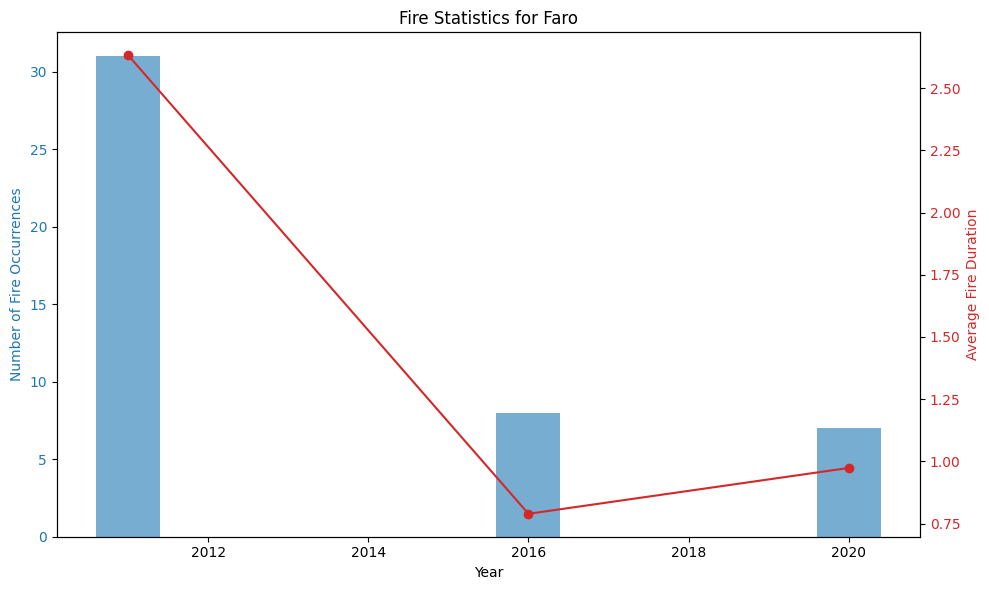

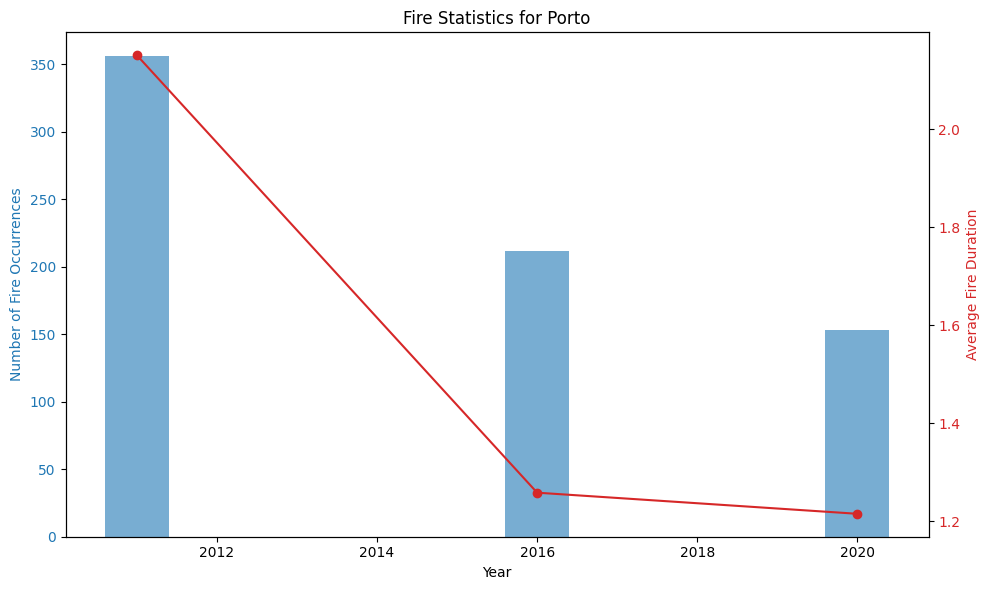

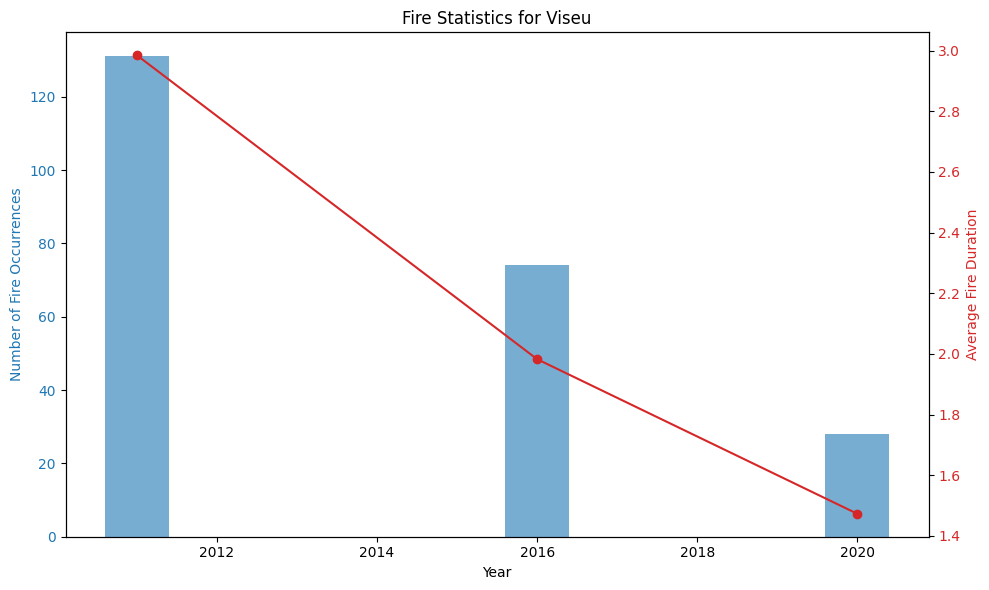

In [20]:
# Agrupar os dados por distrito e ano
df = dataset_sample
grouped = df.groupby(['Distrito', 'Ano']).agg(
    avg_fire_duration = ('Duracao_Horas', 'mean'),  # Duração média do fogo
    fire_occurrences = ('Duracao_Horas', 'count')   # Número de ocorrências de incêndios
).reset_index()

# Plotando o gráfico com dois eixos Y (dual-axis plot)
plt.figure(figsize=(12, 6))
regions = grouped['Distrito'].unique()

for region in regions:
    data_region = grouped[grouped['Distrito'] == region]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Gráfico de barras (eixo esquerdo) - Número de ocorrências de incêndios
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Fire Occurrences', color=color)
    ax1.bar(data_region['Ano'], data_region['fire_occurrences'], color=color, alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)

    # Eixo direito para a duração média dos incêndios
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Average Fire Duration', color=color)
    ax2.plot(data_region['Ano'], data_region['avg_fire_duration'], color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Fire Statistics for {region}')
    fig.tight_layout()
    plt.show()


The dual-axis plot visualizes fire statistics for different regions (districts) over the years. Specifically, it displays two key metrics:

1. Number of Fire Occurrences (Bar Graph): Represented by blue bars on the left y-axis, this metric shows the total count of fire occurrences for each district in the specified years. Higher bars indicate more frequent fire incidents in that region for a given year.

2. Average Fire Duration (Line Graph): Illustrated by a red line on the right y-axis, this metric indicates the average duration of fires (in hours) for each district. The data points connected by the line represent the average duration for the corresponding years, allowing us to see trends in how long fires last over time.

By observing these graphs, we can see that the duration of fires has shown a tendency to decrease over the years, except for Faro, where we identified an increase from 2016 to 2020.

# Garbage from now on (ignore this)

### **Correlation Matrix**

In [4]:
# load the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_excel('datasets/clean_dataset.xlsx')

dataset

,Codigo_SGIF,Ano,AreaPov_ha,AreaMato_ha,AreaAgric_ha,AreaTotal_ha,ClasseArea,Duracao_Horas,IncSup24horas,Distrito,Concelho,FonteAlerta,TypeArea
0,DM2111,2011,0.00,0.0100,0.0,0.0100,]0 a 1 ha[,0.733333,0,Porto,Penafiel,Populares,Forest
1,DM2113,2011,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.783333,0,Porto,Vila Nova de Gaia,Populares,Forest
2,DM2116,2011,0.04,0.0000,0.0,0.0400,]0 a 1 ha[,2.033333,0,Porto,Vila Nova de Gaia,Populares,Rural
3,BL1112,2011,5.00,135.0000,0.0,140.0000,[100 a 500 ha],8.083333,0,Viseu,São Pedro do Sul,Populares,Forest
4,BL1113,2011,0.00,0.1000,0.0,0.1000,]0 a 1 ha[,2.333333,0,Viseu,Castro Daire,Populares,Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18412,DM2203922,2020,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.633333,0,Porto,Paços de Ferreira,Outros,Forest
18413,BL120914,2020,0.00,0.0100,0.0,0.0100,]0 a 1 ha[,1.283333,0,Viseu,Cinfães,Populares,Forest
18414,BL120915,2020,0.00,0.0014,0.0,0.0014,]0 a 1 ha[,0.383333,0,Viseu,São João da Pesqueira,Outros,Forest
18415,BL120916,2020,0.00,0.0050,0.0,0.0050,]0 a 1 ha[,0.716667,0,Viseu,Castro Daire,117,Forest


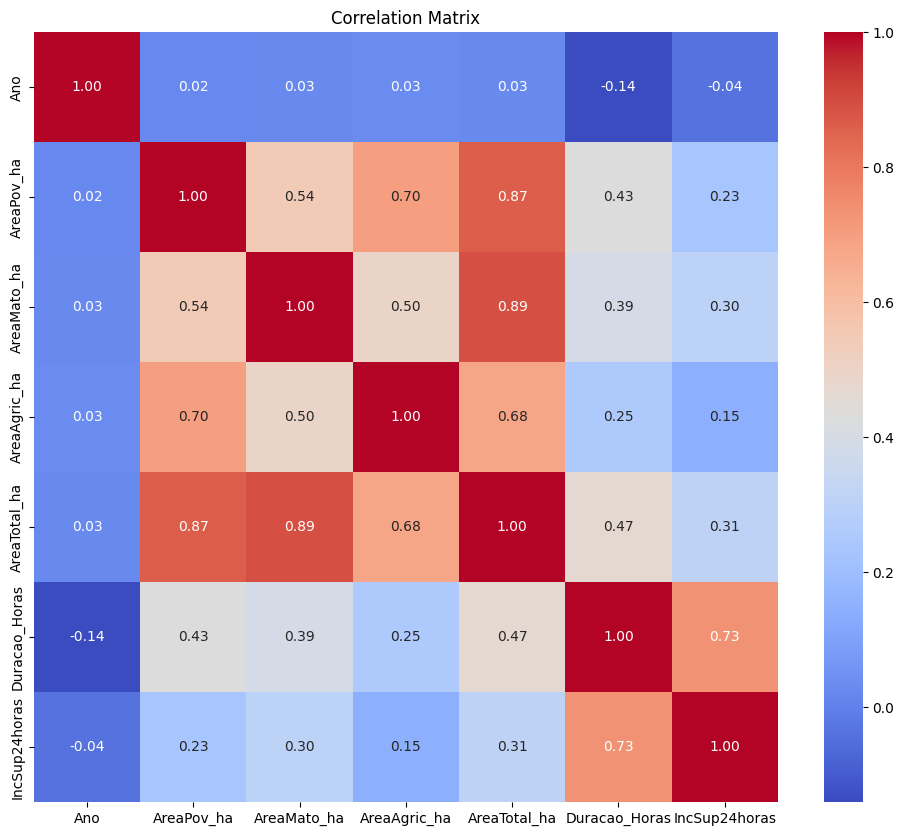

In [5]:
# drop columns with type object
dataset1 = dataset.select_dtypes(exclude=['object'])

# plot a correlation matrix
corr = dataset1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
dataset.describe()

In [ ]:
# check for missing values
dataset.isnull().sum()

In [ ]:
# drop columns RNAP and RNMPF
dataset = dataset.drop(columns=['RNAP', 'RNMPF', 'X_Militar', 'Y_Militar', 'Latitude', 'Longitude', 'X_ETRS89', 'Y_ETRS89'])
dataset.isnull().sum()

In [ ]:
# plot the mean duration of fires per region in the year 2017 and compare it with the mean duration of fires in the 2017
dataset_2017 = dataset[dataset['Ano'] == 2017]
mean_duration_per_region = dataset_2017.groupby('Distrito')['Duracao_Horas'].mean()
mean_duration_per_region = mean_duration_per_region.sort_values(ascending=False)

mean_duration_year_2017 = dataset_2017['Duracao_Horas'].mean()

plt.figure(figsize=(15, 10))
sns.barplot(x=mean_duration_per_region.index, y=mean_duration_per_region.values)
plt.axhline(mean_duration_year_2017, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.title('Mean duration of fires per region in 2017')
plt.show()

In [ ]:
# drop rows with missing values
dataset = dataset.dropna()

In [ ]:
dataset.columns

In [ ]:
# create a new dataset with only the columns we want
dataset = dataset.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10]]

teste